In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
plt.rc('font', family='NanumBarunGothic')

In [ ]:
import warnings
warnings.resetwarnings()

In [ ]:
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
The following NEW packages will be installed:
  fonts-nanum
0 upgraded, 1 newly installed, 0 to remove and 45 not upgraded.
Need to get 10.3 MB of archives.
After this operation, 34.1 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu jammy/universe amd64 fonts-nanum all 20200506-1 [10.3 MB]
Fetched 10.3 MB in 1s (8,565 kB/s)
debconf: unable to initialize frontend: Dialog
debconf: (No usable dialog-like program is installed, so the dialog based frontend cannot be used. at /usr/share/perl5/Debconf/FrontEnd/Dialog.pm line 78, <> line 1.)
debconf: falling back to frontend: Readline
debconf: unable to initialize frontend: Readline
debconf: (This frontend requires a controlling tty.)
debconf: falling back to frontend: Teletype
dpkg-preconfigure: unable to re-open stdin: 
Selecting previously unselected package fonts-nanum.
(Reading database ... 121753 files and dire

# 택배 군집분석

In [ ]:
data = pd.read_csv('/content/drive/MyDrive/data/택배.csv')

In [ ]:
data

,행정동명,생활인구수 연평균,생활인구 순위,주차장 개수,총 주차면,주차장 순위,택배 건수 비율,택배 순위,거주인구수
0,가양1동,47835.79557,1,2,240,7,10.5033,1,34016
1,가양2동,15054.99750,16,1,79,17,2.1908,20,13499
2,가양3동,12432.22983,20,2,136,14,2.7524,18,14210
3,공항동,35932.16109,4,3,151,12,6.8341,5,29659
4,등촌1동,22042.03790,12,0,0,19,4.5300,10,24923
5,등촌2동,14954.20231,17,1,90,16,3.1523,16,19420
6,등촌3동,39677.61132,3,2,163,11,5.0874,9,29496
7,발산1동,33127.41657,8,2,224,9,7.0232,4,35730
8,방화1동,35018.07234,6,2,209,10,5.5696,7,42164
9,방화2동,28407.81348,10,2,804,2,3.6725,13,22713


In [ ]:
data['생활인구 비율'] = data['생활인구수 연평균'] / sum(data['생활인구수 연평균']) * 100

In [ ]:
data['주차면 비율'] = data['총 주차면'] / sum(data['총 주차면']) * 100

In [ ]:
data['거주인구 비율'] = data['거주인구수'] / sum(data['거주인구수']) * 100

In [ ]:
data

,행정동명,생활인구수 연평균,생활인구 순위,주차장 개수,총 주차면,주차장 순위,택배 건수 비율,택배 순위,거주인구수,생활인구 비율,주차면 비율,거주인구 비율
0,가양1동,47835.79557,1,2,240,7,10.5033,1,34016,8.825363,4.530867,6.034812
1,가양2동,15054.99750,16,1,79,17,2.1908,20,13499,2.777540,1.491410,2.394871
2,가양3동,12432.22983,20,2,136,14,2.7524,18,14210,2.293658,2.567491,2.521010
3,공항동,35932.16109,4,3,151,12,6.8341,5,29659,6.629227,2.850670,5.261832
4,등촌1동,22042.03790,12,0,0,19,4.5300,10,24923,4.066599,0.000000,4.421614
5,등촌2동,14954.20231,17,1,90,16,3.1523,16,19420,2.758944,1.699075,3.445321
6,등촌3동,39677.61132,3,2,163,11,5.0874,9,29496,7.320236,3.077214,5.232914
7,발산1동,33127.41657,8,2,224,9,7.0232,4,35730,6.111772,4.228809,6.338894
8,방화1동,35018.07234,6,2,209,10,5.5696,7,42164,6.460584,3.945630,7.480356
9,방화2동,28407.81348,10,2,804,2,3.6725,13,22713,5.241039,15.178403,4.029535


## K-means

In [ ]:
df = data[['행정동명', '생활인구수 연평균', '총 주차면', '택배 건수 비율']]

In [ ]:
from sklearn.metrics import silhouette_score
from sklearn.cluster import KMeans

# 엘보우 메서드를 통한 최적의 군집 개수 확인
# 군집화에 사용할 특성 선택
X = df[['생활인구수 연평균', '총 주차면', '택배 건수 비율']]

# 최대 군집 개수 설정
max_clusters = 10
# 각 군집 개수에 대한 응집도를 저장할 리스트
inertia_values = []

# 군집 개수를 1부터 최대 개수까지 변화시키며 모델 학습 및 응집도 저장
for k in range(1, max_clusters + 1):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X)
    inertia_values.append(kmeans.inertia_)

# 응집도를 그래프로 시각화하여 엘보우 메서드 적용
plt.figure(figsize=(10, 6))
plt.plot(range(1, max_clusters + 1), inertia_values, marker='o')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.title('Elbow Method')
plt.xticks(np.arange(1, max_clusters + 1, step=1))
plt.grid(True)
plt.show()

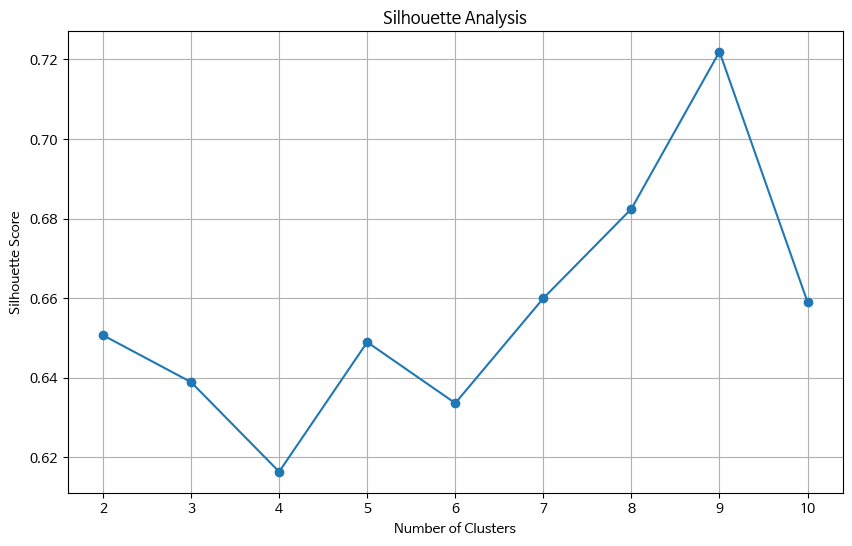

In [ ]:
# 실루엣 분석을 통한 최적의 군집 개수 확인

# 군집화에 사용할 특성 선택
X = df[['생활인구수 연평균', '총 주차면', '택배 건수 비율']]

# 최대 군집 개수 설정
max_clusters = 10
# 각 군집 개수에 대한 실루엣 점수를 저장할 리스트
silhouette_scores = []

# 군집 개수를 2부터 최대 개수까지 변화시키며 모델 학습 및 실루엣 점수 저장
for k in range(2, max_clusters + 1):
    kmeans = KMeans(n_clusters=k, random_state=42)
    cluster_labels = kmeans.fit_predict(X)
    silhouette_avg = silhouette_score(X, cluster_labels)
    silhouette_scores.append(silhouette_avg)

# 실루엣 점수를 그래프로 시각화하여 최적의 군집 개수 찾기
plt.figure(figsize=(10, 6))
plt.plot(range(2, max_clusters + 1), silhouette_scores, marker='o')
plt.xlabel('Number of Clusters')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Analysis')
plt.xticks(np.arange(2, max_clusters + 1, step=1))
plt.grid(True)
plt.show()

In [ ]:

# 군집화에 사용할 특성 선택
X = df[['생활인구수 연평균', '총 주차면', '택배 건수 비율']]

# K-means 모델 생성
kmeans = KMeans(n_clusters=3)  # 원하는 군집의 개수로 설정
kmeans.fit(X)

# 각 데이터 포인트의 군집 번호 확인
clusters = kmeans.predict(X)

# 결과를 데이터프레임에 추가
df['cluster'] = clusters

# 각 군집의 특성 확인
cluster_stats = df.groupby('cluster').mean()

cluster_stats

In [ ]:
df[df['cluster'] == 2]

,행정동명,생활인구수 연평균,총 주차면,택배 건수 비율,cluster
0,가양1동,47835.79557,240,10.5033,2
6,등촌3동,39677.61132,163,5.0874,2
13,화곡1동,46974.92993,1019,8.1120,2


In [ ]:
# 산점도 그리기
plt.figure(figsize=(10, 6))
colors = ['red', 'green', 'blue', 'purple']  # cluster에 따른 색깔 정의

for i, cluster in enumerate(df['cluster']):
    plt.scatter(df.loc[i, '총 주차면'], df.loc[i, '택배 건수 비율'], color=colors[cluster], label=f'Cluster {cluster}')

plt.xlabel('총 주차면')
plt.ylabel('택배 건수 비율')
plt.title('주차면적과 택배 건수 비율 산점도')
plt.grid(True)
plt.show()

## 계층적 군집화

In [ ]:
df = data[['행정동명', '생활인구수 연평균', '총 주차면', '택배 건수 비율']]

In [ ]:
from sklearn.cluster import AgglomerativeClustering
from scipy.cluster.hierarchy import dendrogram

# 군집화 모델 생성
model = AgglomerativeClustering(n_clusters=3, linkage='ward')

# 데이터 학습
clusters = model.fit_predict(df[['생활인구수 연평균', '총 주차면', '택배 건수 비율']])
df['Cluster'] = clusters

# 각 군집의 특성을 출력하는 코드
cluster_centers = []
for cluster_num in range(3):  # 군집의 개수에 따라 수정
    cluster_data = df[df['Cluster'] == cluster_num]
    cluster_center = cluster_data[['생활인구수 연평균', '총 주차면', '택배 건수 비율']].mean()
    cluster_centers.append(cluster_center)

# 각 군집의 특성을 DataFrame으로 변환하여 출력
cluster_centers_df = pd.DataFrame(cluster_centers, columns=['생활인구수 연평균', '총 주차면', '택배 건수 비율'])
cluster_centers_df

,생활인구수 연평균,총 주차면,택배 건수 비율
0,33016.112282,284.777778,5.727344
1,16674.517851,163.888889,3.315411
2,47405.362750,629.500000,9.307650


In [ ]:
df[df['Cluster'] == 2]

,행정동명,생활인구수 연평균,총 주차면,택배 건수 비율,Cluster
0,가양1동,47835.79557,240,10.5033,2
13,화곡1동,46974.92993,1019,8.1120,2


## GMM 군집화

In [ ]:
df = data[['행정동명', '생활인구수 연평균', '총 주차면', '택배 건수 비율']]

In [ ]:
from sklearn.mixture import GaussianMixture
from sklearn.preprocessing import StandardScaler

# 특성 스케일링
scaler = StandardScaler()
scaled_data = scaler.fit_transform(df[['생활인구수 연평균', '총 주차면', '택배 건수 비율']])

# GMM 모델 정의 및 학습
gmm = GaussianMixture(n_components=3, random_state=42)
gmm.fit(scaled_data)

# 군집화 결과 출력
clusters = gmm.predict(scaled_data)
df['Cluster'] = clusters

# 각 군집별 특성을 출력하는 코드
cluster_centers = []
for cluster_num in range(3):  # 군집의 개수에 따라 수정
    cluster_data = df[df['Cluster'] == cluster_num]
    cluster_center = cluster_data[['생활인구수 연평균', '총 주차면', '택배 건수 비율']].mean()
    cluster_centers.append(cluster_center)

# 각 군집의 특성을 DataFrame으로 변환하여 출력
cluster_centers_df = pd.DataFrame(cluster_centers, columns=['생활인구수 연평균', '총 주차면', '택배 건수 비율'])
cluster_centers_df

NameError: name 'df' is not defined

In [ ]:
df[df['Cluster'] == 2]

,행정동명,생활인구수 연평균,총 주차면,택배 건수 비율,Cluster
13,화곡1동,46974.92993,1019,8.112,2


## k-medoids 군집화

In [ ]:
!pip install scikit-learn-extra

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 9.2 MB/s eta 0:00:00


<frozen importlib._bootstrap>:914: ImportWarning: _PyDrive2ImportHook.find_spec() not found; falling back to find_module()
<frozen importlib._bootstrap>:914: ImportWarning: _PyDriveImportHook.find_spec() not found; falling back to find_module()
<frozen importlib._bootstrap>:914: ImportWarning: _GenerativeAIImportHook.find_spec() not found; falling back to find_module()
<frozen importlib._bootstrap>:914: ImportWarning: _OpenCVImportHook.find_spec() not found; falling back to find_module()
<frozen importlib._bootstrap>:914: ImportWarning: APICoreClientInfoImportHook.find_spec() not found; falling back to find_module()
<frozen importlib._bootstrap>:914: ImportWarning: _BokehImportHook.find_spec() not found; falling back to find_module()
<frozen importlib._bootstrap>:914: ImportWarning: _AltairImportHook.find_spec() not found; falling back to find_module()
/usr/local/lib/python3.10/dist-packages/google/colab/_pip.py:86: ResourceWarning: unclosed file <_io.TextIOWrapper name='/usr/local/lib

In [ ]:
df = data[['행정동명', '생활인구수 연평균', '총 주차면', '택배 건수 비율']]

In [ ]:
from sklearn_extra.cluster import KMedoids
from sklearn.preprocessing import StandardScaler

# 특성 스케일링
scaler = StandardScaler()
scaled_data = scaler.fit_transform(df[['생활인구수 연평균', '총 주차면', '택배 건수 비율']])

# k-medoids 모델 정의
kmedoids = KMedoids(n_clusters=3, random_state=42)

# 군집화 수행
clusters = kmedoids.fit_predict(scaled_data)

# 군집화 결과를 데이터프레임에 추가
df['Cluster'] = clusters

# 각 군집별 특성을 출력
cluster_centers = []
for cluster_num in range(3):  # 군집의 개수에 따라 수정
    cluster_data = df[df['Cluster'] == cluster_num]
    cluster_center = cluster_data[['생활인구수 연평균', '총 주차면', '택배 건수 비율']].mean()
    cluster_centers.append(cluster_center)

# 각 군집의 특성을 DataFrame으로 변환하여 출력
cluster_centers_df = pd.DataFrame(cluster_centers, columns=['생활인구수 연평균', '총 주차면', '택배 건수 비율'])
cluster_centers_df

,생활인구수 연평균,총 주차면,택배 건수 비율
0,16102.359147,131.250000,3.226675
1,36628.123161,150.714286,7.072086
2,31362.132278,638.400000,4.936420


In [ ]:
df[df['Cluster'] == 1]

,행정동명,생활인구수 연평균,총 주차면,택배 건수 비율,Cluster
0,가양1동,47835.79557,240,10.5033,1
3,공항동,35932.16109,151,6.8341,1
6,등촌3동,39677.61132,163,5.0874,1
7,발산1동,33127.41657,224,7.0232,1
8,방화1동,35018.07234,209,5.5696,1
11,염창동,29629.89622,0,7.6669,1
12,우장산동,35175.90902,68,6.8201,1


In [ ]:
df[df['Cluster'] == 2]

,행정동명,생활인구수 연평균,총 주차면,택배 건수 비율,Cluster
9,방화2동,28407.81348,804,3.6725,2
13,화곡1동,46974.92993,1019,8.1120,2
17,화곡6동,21251.78748,425,4.0253,2
18,화곡8동,33150.31140,516,3.5510,2
19,화곡본동,27025.81910,428,5.3213,2


____________________________________________________________________

In [ ]:
living = pd.read_csv('/content/거주인구2.csv')

In [ ]:
living

,기준년월,행정동명,성별코드,거주인구수,자치구명
0,202210,가양1동,1,378,강서구
1,202210,방화2동,1,280,강서구
2,202210,공항동,1,678,강서구
3,202210,염창동,1,773,강서구
4,202210,우장산동,1,526,강서구
...,...,...,...,...,...
4189,202310,등촌2동,2,1,강서구
4190,202310,가양2동,2,2,강서구
4191,202310,발산1동,2,3,강서구
4192,202310,가양1동,2,5,강서구


In [ ]:
ddf = living.groupby('행정동명')['거주인구수'].sum()

In [ ]:
ddf

행정동명
가양1동    34016
가양2동    13499
가양3동    14210
공항동     29659
등촌1동    24923
등촌2동    19420
등촌3동    29496
발산1동    35730
방화1동    42164
방화2동    22713
방화3동    22052
염창동     41360
우장산동    43791
화곡1동    51088
화곡2동    17141
화곡3동    21148
화곡4동    19817
화곡6동    24843
화곡8동    23555
화곡본동    33038
Name: 거주인구수, dtype: int64

In [ ]:
df = data[['행정동명', '생활인구 비율', '주차면 비율', '택배 건수 비율']]

In [ ]:
df

,행정동명,생활인구 비율,주차면 비율,택배 건수 비율
0,가양1동,8.825363,4.530867,10.5033
1,가양2동,2.777540,1.491410,2.1908
2,가양3동,2.293658,2.567491,2.7524
3,공항동,6.629227,2.850670,6.8341
4,등촌1동,4.066599,0.000000,4.5300
5,등촌2동,2.758944,1.699075,3.1523
6,등촌3동,7.320236,3.077214,5.0874
7,발산1동,6.111772,4.228809,7.0232
8,방화1동,6.460584,3.945630,5.5696
9,방화2동,5.241039,15.178403,3.6725


# 정규화 진행

In [ ]:
from sklearn.preprocessing import StandardScaler

# 특성 선택
features = ['생활인구 비율', '주차면 비율', '택배 건수 비율']
X = df[features]

# 표준화 (정규화)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# 정규화된 데이터를 데이터프레임으로 변환
X_scaled_df = pd.DataFrame(X_scaled, columns=features)

# 행정동명과 정규화된 데이터 합치기
normalized_data = pd.concat([df[['행정동명']], X_scaled_df], axis=1)

In [ ]:
normalized_data

,행정동명,생활인구 비율,주차면 비율,택배 건수 비율
0,가양1동,1.916356,-0.097175,2.556901
1,가양2동,-1.113365,-0.726760,-1.305193
2,가양3동,-1.355771,-0.503864,-1.044266
3,공항동,0.816179,-0.445207,0.852144
4,등촌1동,-0.467597,-1.035687,-0.218370
5,등촌2동,-1.122681,-0.683745,-0.858467
6,등촌3동,1.162347,-0.398281,0.040605
7,발산1동,0.556954,-0.159743,0.940002
8,방화1동,0.731695,-0.218400,0.264641
9,방화2동,0.120751,2.108328,-0.616776


## k-means

In [ ]:
from sklearn.cluster import KMeans

# 군집화에 사용할 특성 선택
X = normalized_data[['생활인구 비율', '주차면 비율', '택배 건수 비율']]

# K-means 모델 생성
kmeans = KMeans(n_clusters=3)  # 원하는 군집의 개수로 설정
kmeans.fit(X)

# 각 데이터 포인트의 군집 번호 확인
clusters = kmeans.predict(X)

# 결과를 데이터프레임에 추가
normalized_data['kmeans_cluster'] = clusters

# 각 군집의 특성 확인
# '행정동' 열을 제외한 열들로 구성된 데이터프레임 생성
data_without_dong = normalized_data.drop(columns=['행정동명'])

# 클러스터별 평균 구하기
cluster_stats = data_without_dong.groupby('kmeans_cluster').mean()

cluster_stats

,생활인구 비율,주차면 비율,택배 건수 비율
kmeans_cluster,,,
0,-0.963683,-0.394805,-0.782684
1,0.627409,1.669378,0.076287
2,0.880502,-0.446324,0.962715


In [ ]:
normalized_data[normalized_data['kmeans_cluster'] == 2]

,행정동명,생활인구 비율,주차면 비율,택배 건수 비율,kmeans_cluster
0,가양1동,1.916356,-0.097175,2.556901,2
3,공항동,0.816179,-0.445207,0.852144,2
6,등촌3동,1.162347,-0.398281,0.040605,2
7,발산1동,0.556954,-0.159743,0.940002,2
8,방화1동,0.731695,-0.218400,0.264641,2
11,염창동,0.233700,-1.035687,1.239074,2
12,우장산동,0.746283,-0.769775,0.845639,2


In [ ]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

X = normalized_data[['생활인구 비율', '주차면 비율', '택배 건수 비율']]

# K-means 모델 생성 및 군집화
kmeans = KMeans(n_clusters=3)  # 예시로 3개의 군집으로 설정
kmeans.fit(X)

# 각 데이터 포인트의 군집 번호 확인
kmeans_clusters = kmeans.predict(X)

# 실루엣 스코어 계산
kmeans_silhouette_avg = silhouette_score(X, kmeans_clusters)
print(f"K-means 군집화의 실루엣 스코어: {kmeans_silhouette_avg}")


K-means 군집화의 실루엣 스코어: 0.4887165819931852


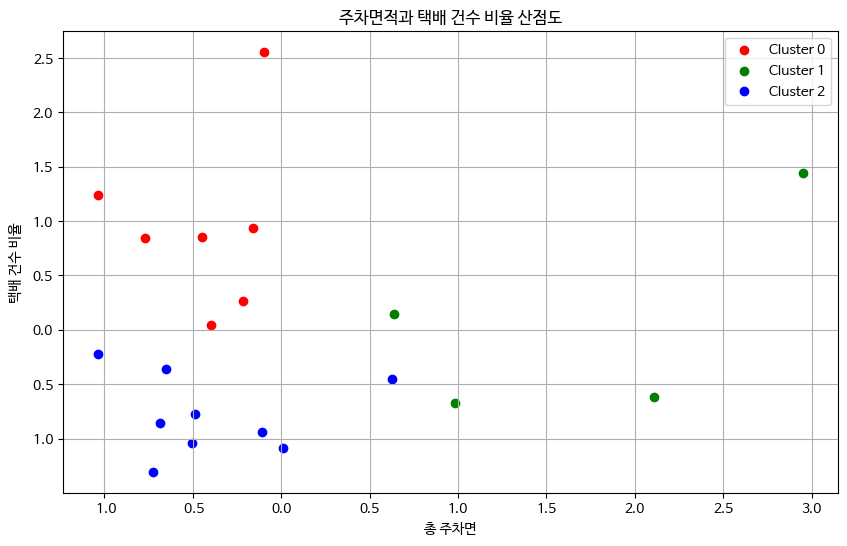

In [ ]:
# 산점도 그리기
plt.figure(figsize=(10, 6))
colors = ['red', 'green', 'blue', 'purple']  # cluster에 따른 색깔 정의

for cluster_num in range(4):  # 클러스터가 4가지인 경우
    cluster_data = normalized_data[normalized_data['kmeans_cluster'] == cluster_num]
    if not cluster_data.empty:  # 해당 클러스터에 데이터가 있는 경우에만 그리기
        plt.scatter(cluster_data['총 주차면'], cluster_data['택배 건수 비율'], color=colors[cluster_num], label=f'Cluster {cluster_num}')

plt.xlabel('총 주차면')
plt.ylabel('택배 건수 비율')
plt.title('주차면적과 택배 건수 비율 산점도')
plt.legend()
plt.grid(True)
plt.show()

## 계층적 군집화

In [ ]:
from sklearn.cluster import AgglomerativeClustering
from scipy.cluster.hierarchy import dendrogram

X = normalized_data[['생활인구 비율', '주차면 비율', '택배 건수 비율']]

# 군집화 모델 생성
model = AgglomerativeClustering(n_clusters=3, linkage='ward')

# 데이터 학습
clusters = model.fit_predict(X)
normalized_data['h_cluster'] = clusters

# 각 군집의 특성 확인
# '행정동' 열을 제외한 열들로 구성된 데이터프레임 생성
data_without_dong = normalized_data.drop(columns=['행정동명'])

cluster_stats = data_without_dong.groupby('h_cluster').mean()
cluster_stats

,생활인구 비율,주차면 비율,택배 건수 비율,kmeans_cluster
h_cluster,,,,
0,0.393800,1.460755,-0.029542,0.8
1,-1.016564,-0.522438,-0.823912,0.0
2,0.880502,-0.446324,0.962715,2.0


In [ ]:
normalized_data[normalized_data['h_cluster'] == 2]

,행정동명,생활인구 비율,주차면 비율,택배 건수 비율,kmeans_cluster,h_cluster
0,가양1동,1.916356,-0.097175,2.556901,2,2
3,공항동,0.816179,-0.445207,0.852144,2,2
6,등촌3동,1.162347,-0.398281,0.040605,2,2
7,발산1동,0.556954,-0.159743,0.940002,2,2
8,방화1동,0.731695,-0.218400,0.264641,2,2
11,염창동,0.233700,-1.035687,1.239074,2,2
12,우장산동,0.746283,-0.769775,0.845639,2,2


In [ ]:
from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics import silhouette_score

X = normalized_data[['생활인구 비율', '주차면 비율', '택배 건수 비율']]

# 계층군집화 모델 생성 및 군집화
hc = AgglomerativeClustering(n_clusters=3)  # 예시로 3개의 군집으로 설정
hc_clusters = hc.fit_predict(X)

# 실루엣 스코어 계산
hc_silhouette_avg = silhouette_score(X, hc_clusters)
print(f"계층군집화의 실루엣 스코어: {hc_silhouette_avg}")

계층군집화의 실루엣 스코어: 0.48416376362512753


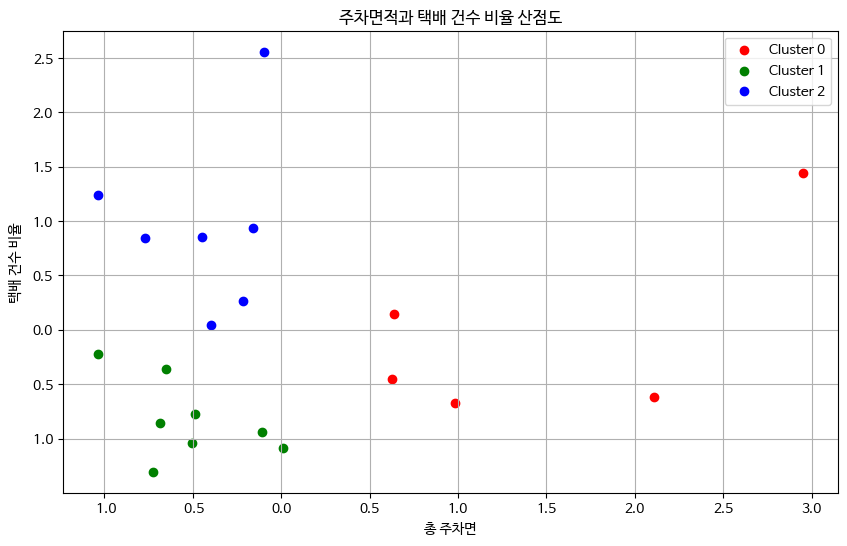

In [ ]:
# 산점도 그리기
plt.figure(figsize=(10, 6))
colors = ['red', 'green', 'blue', 'purple']  # cluster에 따른 색깔 정의

for cluster_num in range(4):  # 클러스터가 4가지인 경우
    cluster_data = normalized_data[normalized_data['h_cluster'] == cluster_num]
    if not cluster_data.empty:  # 해당 클러스터에 데이터가 있는 경우에만 그리기
        plt.scatter(cluster_data['총 주차면'], cluster_data['택배 건수 비율'], color=colors[cluster_num], label=f'Cluster {cluster_num}')

plt.xlabel('총 주차면')
plt.ylabel('택배 건수 비율')
plt.title('주차면적과 택배 건수 비율 산점도')
plt.legend()
plt.grid(True)
plt.show()

## GMM 군집화

In [ ]:
from sklearn.mixture import GaussianMixture
from sklearn.preprocessing import StandardScaler

X = normalized_data[['생활인구 비율', '주차면 비율', '택배 건수 비율']]

# GMM 모델 정의 및 학습
gmm = GaussianMixture(n_components=3, random_state=42)
gmm.fit(X)

# 군집화 결과 추가
clusters = gmm.predict(X)
normalized_data['gmm_cluster'] = clusters

# 각 군집의 특성 확인
# '행정동' 열을 제외한 열들로 구성된 데이터프레임 생성
data_without_dong = normalized_data.drop(columns=['행정동명'])

cluster_stats = data_without_dong.groupby('gmm_cluster').mean()
cluster_stats

,생활인구 비율,주차면 비율,택배 건수 비율,kmeans_cluster,h_cluster
gmm_cluster,,,,,
0,0.840323,-0.267769,0.758223,1.875000,1.750000
1,-0.778125,-0.073357,-0.682878,0.181818,0.727273
2,1.836791,2.949079,1.445873,1.000000,0.000000


In [ ]:
normalized_data[normalized_data['gmm_cluster'] == 2]

,행정동명,생활인구 비율,주차면 비율,택배 건수 비율,kmeans_cluster,h_cluster,gmm_cluster
13,화곡1동,1.836791,2.949079,1.445873,1,0,2


In [ ]:
from sklearn.mixture import GaussianMixture
from sklearn.metrics import silhouette_score

X = normalized_data[['생활인구 비율', '주차면 비율', '택배 건수 비율']]

# GMM 모델 생성 및 군집화
gmm = GaussianMixture(n_components=3)  # 예시로 3개의 군집으로 설정
gmm.fit(X)

# 각 데이터 포인트의 군집 번호 확인
gmm_clusters = gmm.predict(X)

# 실루엣 스코어 계산
gmm_silhouette_avg = silhouette_score(X, gmm_clusters)
print(f"GMM 군집화의 실루엣 스코어: {gmm_silhouette_avg}")

GMM 군집화의 실루엣 스코어: 0.4112465018154133


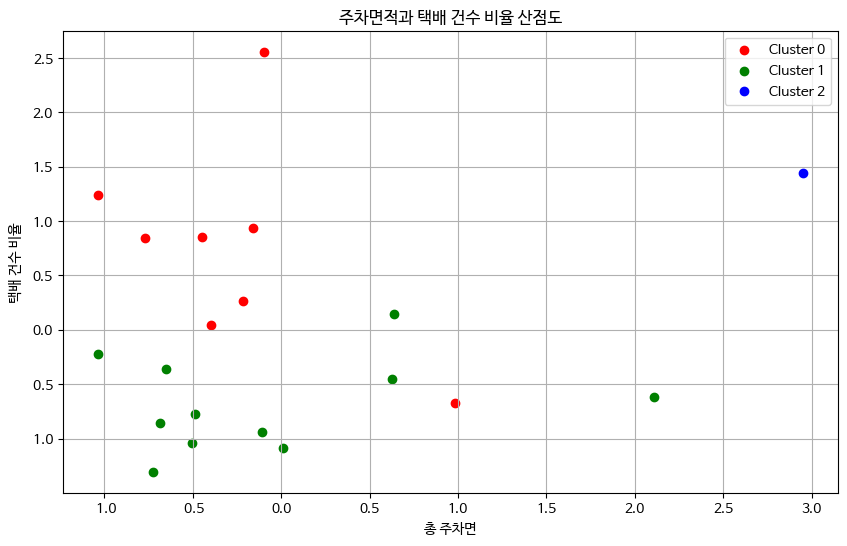

In [ ]:
# 산점도 그리기
plt.figure(figsize=(10, 6))
colors = ['red', 'green', 'blue', 'purple']  # cluster에 따른 색깔 정의

for cluster_num in range(4):  # 클러스터가 4가지인 경우
    cluster_data = normalized_data[normalized_data['gmm_cluster'] == cluster_num]
    if not cluster_data.empty:  # 해당 클러스터에 데이터가 있는 경우에만 그리기
        plt.scatter(cluster_data['총 주차면'], cluster_data['택배 건수 비율'], color=colors[cluster_num], label=f'Cluster {cluster_num}')

plt.xlabel('총 주차면')
plt.ylabel('택배 건수 비율')
plt.title('주차면적과 택배 건수 비율 산점도')
plt.legend()
plt.grid(True)
plt.show()

## k-medoids 군집화

In [ ]:
from sklearn_extra.cluster import KMedoids
from sklearn.preprocessing import StandardScaler

X = normalized_data[['생활인구 비율', '주차면 비율', '택배 건수 비율']]

# k-medoids 모델 정의
kmedoids = KMedoids(n_clusters=3, random_state=42)

# 군집화 수행
clusters = kmedoids.fit_predict(X)

# 군집화 결과 추가
normalized_data['km_cluster'] = clusters

# 각 군집의 특성 확인
# '행정동' 열을 제외한 열들로 구성된 데이터프레임 생성
data_without_dong = normalized_data.drop(columns=['행정동명'])

cluster_stats = data_without_dong.groupby('km_cluster').mean()
cluster_stats

,생활인구 비율,주차면 비율,택배 건수 비율,kmeans_cluster,h_cluster,gmm_cluster
km_cluster,,,,,,
0,-1.016564,-0.522438,-0.823912,0.0,1.0,1.0
1,0.880502,-0.446324,0.962715,2.0,2.0,0.0
2,0.393800,1.460755,-0.029542,0.8,0.0,1.0


In [ ]:
normalized_data[normalized_data['km_cluster'] == 1]

,행정동명,생활인구 비율,주차면 비율,택배 건수 비율,kmeans_cluster,h_cluster,gmm_cluster,km_cluster
0,가양1동,1.916356,-0.097175,2.556901,2,2,0,1
3,공항동,0.816179,-0.445207,0.852144,2,2,0,1
6,등촌3동,1.162347,-0.398281,0.040605,2,2,0,1
7,발산1동,0.556954,-0.159743,0.940002,2,2,0,1
8,방화1동,0.731695,-0.218400,0.264641,2,2,0,1
11,염창동,0.233700,-1.035687,1.239074,2,2,0,1
12,우장산동,0.746283,-0.769775,0.845639,2,2,0,1


In [ ]:
X = normalized_data[['생활인구 비율', '주차면 비율', '택배 건수 비율']]

kmedoids = KMedoids(n_clusters=3)
kmedoids.fit(X)
kmedoids_clusters = kmedoids.predict(X)

#실루엣 점수
km_silhouette_avg = silhouette_score(X, kmedoids_clusters)
print(f"Kmedoids 군집화의 실루엣 스코어: {km_silhouette_avg}")

Kmedoids 군집화의 실루엣 스코어: 0.48416376362512753


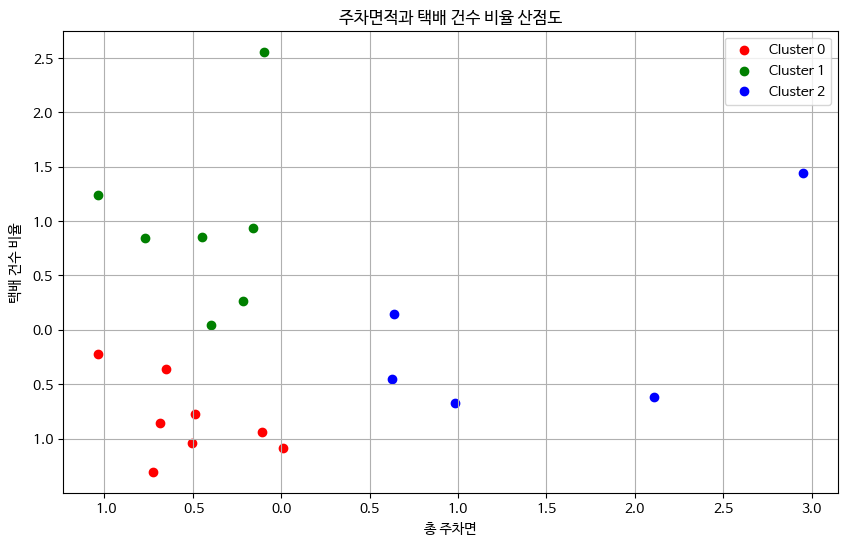

In [ ]:
# 산점도 그리기
plt.figure(figsize=(10, 6))
colors = ['red', 'green', 'blue', 'purple']  # cluster에 따른 색깔 정의

for cluster_num in range(4):  # 클러스터가 4가지인 경우
    cluster_data = normalized_data[normalized_data['km_cluster'] == cluster_num]
    if not cluster_data.empty:  # 해당 클러스터에 데이터가 있는 경우에만 그리기
        plt.scatter(cluster_data['총 주차면'], cluster_data['택배 건수 비율'], color=colors[cluster_num], label=f'Cluster {cluster_num}')

plt.xlabel('총 주차면')
plt.ylabel('택배 건수 비율')
plt.title('주차면적과 택배 건수 비율 산점도')
plt.legend()
plt.grid(True)
plt.show()

# 거주인구로 변경

In [ ]:
df = data[['행정동명', '거주인구 비율', '주차면 비율', '택배 건수 비율']]

In [ ]:
# 특성 선택
features = ['거주인구 비율', '주차면 비율', '택배 건수 비율']
X = df[features]

# 표준화 (정규화)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# 정규화된 데이터를 데이터프레임으로 변환
X_scaled_df = pd.DataFrame(X_scaled, columns=features)

# 행정동명과 정규화된 데이터 합치기
normalized_data = pd.concat([df[['행정동명']], X_scaled_df], axis=1)

In [ ]:
normalized_data

,행정동명,거주인구 비율,주차면 비율,택배 건수 비율
0,가양1동,0.569828,-0.097175,2.556901
1,가양2동,-1.434537,-0.726760,-1.305193
2,가양3동,-1.365078,-0.503864,-1.044266
3,공항동,0.144180,-0.445207,0.852144
4,등촌1동,-0.318494,-1.035687,-0.218370
5,등촌2동,-0.856098,-0.683745,-0.858467
6,등촌3동,0.128256,-0.398281,0.040605
7,발산1동,0.737274,-0.159743,0.940002
8,방화1동,1.365830,-0.218400,0.264641
9,방화2동,-0.534395,2.108328,-0.616776


## k-means

In [ ]:
from sklearn.cluster import KMeans

# 군집화에 사용할 특성 선택
X = normalized_data[['거주인구 비율', '주차면 비율', '택배 건수 비율']]

# K-means 모델 생성
kmeans = KMeans(n_clusters=3)  # 원하는 군집의 개수로 설정
kmeans.fit(X)

# 각 데이터 포인트의 군집 번호 확인
clusters = kmeans.predict(X)

# 결과를 데이터프레임에 추가
normalized_data['kmeans_cluster'] = clusters

# 각 군집의 특성 확인
# '행정동' 열을 제외한 열들로 구성된 데이터프레임 생성
data_without_dong = normalized_data.drop(columns=['행정동명'])

# 클러스터별 평균 구하기
cluster_stats = data_without_dong.groupby('kmeans_cluster').mean()

cluster_stats

,거주인구 비율,주차면 비율,택배 건수 비율
kmeans_cluster,,,
0,0.778964,-0.310784,0.861036
1,2.237641,2.949079,1.445873
2,-0.769941,-0.042073,-0.757651


In [ ]:
normalized_data[normalized_data['kmeans_cluster'] == 1]

,행정동명,거주인구 비율,주차면 비율,택배 건수 비율,kmeans_cluster
13,화곡1동,2.237641,2.949079,1.445873,1


In [ ]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

# K-means 모델 생성 및 군집화
kmeans = KMeans(n_clusters=3)  # 예시로 3개의 군집으로 설정
kmeans.fit(X)

# 각 데이터 포인트의 군집 번호 확인
kmeans_clusters = kmeans.predict(X)

# 실루엣 스코어 계산
kmeans_silhouette_avg = silhouette_score(X, kmeans_clusters)
print(f"K-means 군집화의 실루엣 스코어: {kmeans_silhouette_avg}")


K-means 군집화의 실루엣 스코어: 0.4197194889022242


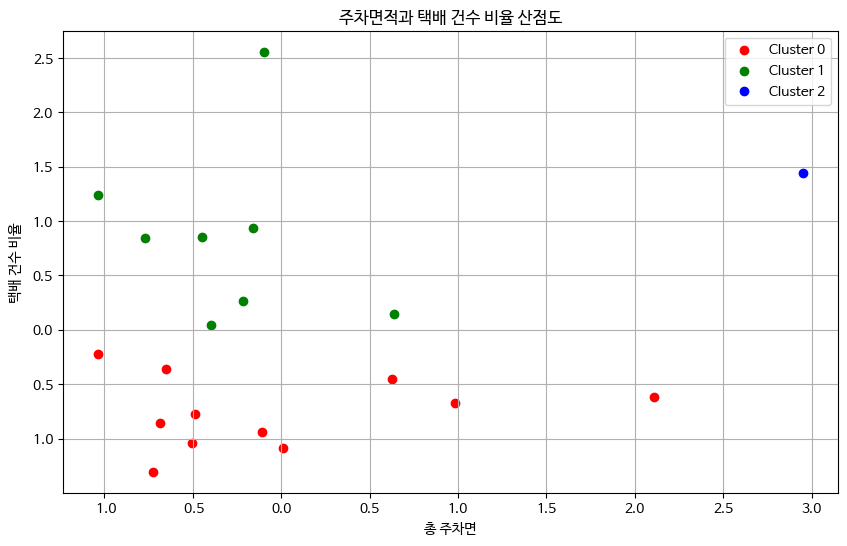

In [ ]:
# 산점도 그리기
plt.figure(figsize=(10, 6))
colors = ['red', 'green', 'blue', 'purple']  # cluster에 따른 색깔 정의

for cluster_num in range(4):  # 클러스터가 4가지인 경우
    cluster_data = normalized_data[normalized_data['kmeans_cluster'] == cluster_num]
    if not cluster_data.empty:  # 해당 클러스터에 데이터가 있는 경우에만 그리기
        plt.scatter(cluster_data['총 주차면'], cluster_data['택배 건수 비율'], color=colors[cluster_num], label=f'Cluster {cluster_num}')

plt.xlabel('총 주차면')
plt.ylabel('택배 건수 비율')
plt.title('주차면적과 택배 건수 비율 산점도')
plt.legend()
plt.grid(True)
plt.show()

## 계층적 군집화

In [ ]:
from sklearn.cluster import AgglomerativeClustering
from scipy.cluster.hierarchy import dendrogram

# 군집화 모델 생성
model = AgglomerativeClustering(n_clusters=3, linkage='ward')

# 데이터 학습
clusters = model.fit_predict(normalized_data[['거주인구 비율', '주차면 비율', '택배 건수 비율']])
normalized_data['h_cluster'] = clusters

# 각 군집의 특성 확인
# '행정동' 열을 제외한 열들로 구성된 데이터프레임 생성
data_without_dong = normalized_data.drop(columns=['행정동명'])

cluster_stats = data_without_dong.groupby('h_cluster').mean()
cluster_stats

,거주인구 비율,주차면 비율,택배 건수 비율,kmeans_cluster
h_cluster,,,,
0,-0.605140,-0.017161,-0.626483,1.692308
1,0.938195,-0.454331,1.116400,0.000000
2,2.237641,2.949079,1.445873,1.000000


In [ ]:
normalized_data[normalized_data['h_cluster'] == 2]

,행정동명,거주인구 비율,주차면 비율,택배 건수 비율,kmeans_cluster,h_cluster
13,화곡1동,2.237641,2.949079,1.445873,1,2


In [ ]:
from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics import silhouette_score

# 계층군집화 모델 생성 및 군집화
hc = AgglomerativeClustering(n_clusters=3)  # 예시로 3개의 군집으로 설정
hc_clusters = hc.fit_predict(X)

# 실루엣 스코어 계산
hc_silhouette_avg = silhouette_score(X, hc_clusters)
print(f"계층군집화의 실루엣 스코어: {hc_silhouette_avg}")

계층군집화의 실루엣 스코어: 0.421683689834492


## GMM 군집화

In [ ]:
from sklearn.mixture import GaussianMixture
from sklearn.preprocessing import StandardScaler

# 특성 스케일링
scaler = StandardScaler()
scaled_data = scaler.fit_transform(normalized_data[['거주인구 비율', '주차면 비율', '택배 건수 비율']])

# GMM 모델 정의 및 학습
gmm = GaussianMixture(n_components=3, random_state=42)
gmm.fit(scaled_data)

# 군집화 결과 추가
clusters = gmm.predict(scaled_data)
normalized_data['gmm_cluster'] = clusters

# 각 군집의 특성 확인
# '행정동' 열을 제외한 열들로 구성된 데이터프레임 생성
data_without_dong = normalized_data.drop(columns=['행정동명'])

cluster_stats = data_without_dong.groupby('gmm_cluster').mean()
cluster_stats

,거주인구 비율,주차면 비율,택배 건수 비율,kmeans_cluster,h_cluster
gmm_cluster,,,,,
0,0.938195,-0.454331,1.116400,0.000000,1.0
1,2.237641,2.949079,1.445873,1.000000,2.0
2,-0.605140,-0.017161,-0.626483,1.692308,0.0


In [ ]:
normalized_data[normalized_data['gmm_cluster'] == 1]

,행정동명,거주인구 비율,주차면 비율,택배 건수 비율,kmeans_cluster,h_cluster,gmm_cluster
13,화곡1동,2.237641,2.949079,1.445873,1,2,1


In [ ]:
from sklearn.mixture import GaussianMixture
from sklearn.metrics import silhouette_score

# GMM 모델 생성 및 군집화
gmm = GaussianMixture(n_components=3)  # 예시로 3개의 군집으로 설정
gmm.fit(X)

# 각 데이터 포인트의 군집 번호 확인
gmm_clusters = gmm.predict(X)

# 실루엣 스코어 계산
gmm_silhouette_avg = silhouette_score(X, gmm_clusters)
print(f"GMM 군집화의 실루엣 스코어: {gmm_silhouette_avg}")

GMM 군집화의 실루엣 스코어: 0.3834288844266702


## k-medoids 군집화

In [ ]:
from sklearn_extra.cluster import KMedoids
from sklearn.preprocessing import StandardScaler

# 특성 스케일링
scaler = StandardScaler()
scaled_data = scaler.fit_transform(df[['거주인구수', '총 주차면', '택배 건수 비율']])

# k-medoids 모델 정의
kmedoids = KMedoids(n_clusters=3, random_state=42)

# 군집화 수행
clusters = kmedoids.fit_predict(scaled_data)

# 군집화 결과 추가
normalized_data['km_cluster'] = clusters

# 각 군집의 특성 확인
cluster_stats = normalized_data.groupby('km_cluster').mean()
cluster_stats

,거주인구수,총 주차면,택배 건수 비율,kmeans_cluster,h_cluster,gmm_cluster
km_cluster,,,,,,
0,1.042637,0.107636,1.036694,0.25,1.0,0.375
1,-0.466518,-0.650115,-0.434480,0.80,0.0,2.000
2,-0.858359,0.341356,-0.874450,1.00,0.0,2.000


In [ ]:
normalized_data[normalized_data['km_cluster'] == 0]

,행정동명,거주인구수,총 주차면,택배 건수 비율,kmeans_cluster,h_cluster,gmm_cluster,km_cluster
0,가양1동,0.569828,-0.097175,2.556901,0,1,0,0
3,공항동,0.144180,-0.445207,0.852144,0,1,0,0
7,발산1동,0.737274,-0.159743,0.940002,0,1,0,0
8,방화1동,1.365830,-0.218400,0.264641,0,1,0,0
11,염창동,1.287285,-1.035687,1.239074,0,1,0,0
12,우장산동,1.524776,-0.769775,0.845639,0,1,0,0
13,화곡1동,2.237641,2.949079,1.445873,2,2,1,0
19,화곡본동,0.474284,0.637993,0.149278,0,0,2,0


In [ ]:
df = pd.read_csv('./null_ilban .csv')

In [ ]:
df2 = pd.read_csv('./null_dong_huegae.csv')

In [ ]:
df

,개방자치단체코드,관리번호,인허가일자,소재지우편번호,지번주소,도로명주소,도로명우편번호,사업장명,최종수정일자,데이터갱신구분,데이터갱신일자,업태구분명,좌표정보(X),좌표정보(Y),경도,위도
0,3150000,3150000-101-1988-05567,19880628,157853,서울특별시 강서구 방화동 619-0번지,NaN,NaN,화곡집,2009-03-19 15:28,I,59:59.0,한식,NaN,NaN,NaN,NaN
1,3150000,3150000-101-1989-08752,19890912,157210,서울특별시 강서구 마곡동 799-6 2층 207호,"서울특별시 강서구 마곡중앙2로 5, 2층 207호 (마곡동)",7631.0,박자매 한상,2021-03-08 14:45,I,23:00.0,기타,NaN,NaN,NaN,NaN
2,3150000,3150000-101-1995-02408,19950213,157811,서울특별시 강서구 공항동 4-44 (지상 1층),NaN,NaN,남도식당,2021-08-18 19:22,U,40:00.0,분식,NaN,NaN,NaN,NaN
3,3150000,3150000-101-1995-04961,19951208,157210,"서울특별시 강서구 마곡동 774-1 (지상 4층), 401~405호","서울특별시 강서구 공항대로 209, 4층 401~405호 (마곡동)",7802.0,대가원,2021-05-04 15:48,U,40:00.0,한식,NaN,NaN,NaN,NaN
4,3150000,3150000-101-1996-09069,19960508,157210,서울특별시 강서구 마곡동 797-7번지 퀸즈파크텐 (지하 1층) B동 B103호,"서울특별시 강서구 마곡중앙6로 66, 퀸즈파크텐 B동 B103호 (마곡동)",7803.0,이태리부대찌개 발산점,2019-10-07 14:02,U,40:00.0,한식,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
326,3150000,3150000-101-2023-00491,2023-07-31,157-210,서울특별시 강서구 마곡동 744 마곡 엠밸리 9단지 109호,"서울특별시 강서구 공항대로 103, 판매시설2동 1층 109호 (마곡동, 마곡 엠밸...",7600.0,브런치앤다이닝37.5(BRUNCH&DINING37.5),2023-07-31 11:34,I,02:00.0,경양식,NaN,NaN,NaN,NaN
327,3150000,3150000-101-2023-00520,2023-08-14,157-210,서울특별시 강서구 마곡동 744 마곡 엠밸리 9단지,"서울특별시 강서구 공항대로 103, 제판매시설2동 1층 110호 (마곡동, 마곡 엠...",7600.0,한돈집,2023-08-14 13:32,I,07:00.0,한식,NaN,NaN,NaN,NaN
328,3150000,3150000-101-2023-00523,2023-08-14,157-280,서울특별시 강서구 내발산동 763 우장산 신일해피트리,"서울특별시 강서구 강서로45길 92-5, 제부대시설동동 제지1층 B02호 (내발산동...",7638.0,황후탕후루 우장산점,2023-08-14 17:54,I,07:00.0,기타,NaN,NaN,NaN,NaN
329,3150000,3150000-101-2023-00672,2023-10-19,157-210,서울특별시 강서구 마곡동 744 마곡 엠밸리 9단지,"서울특별시 강서구 공항대로 103, 판매시설4동 1층 105호 (마곡동, 마곡 엠밸...",7600.0,황제마라탕,2023-12-22 10:34,U,04:00.0,분식,NaN,NaN,NaN,NaN


In [ ]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 132 entries, 0 to 131
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   BASE_DATE    132 non-null    int64  
 1   ADM_NM       132 non-null    object 
 2   ADM_CD       132 non-null    int64  
 3   geometry     132 non-null    object 
 4   index_right  132 non-null    int64  
 5   지번주소         132 non-null    object 
 6   위도           132 non-null    float64
 7   경도           132 non-null    float64
dtypes: float64(2), int64(3), object(3)
memory usage: 8.4+ KB


In [ ]:
df2

,BASE_DATE,ADM_NM,ADM_CD,geometry,index_right,지번주소,위도,경도
0,20230701,가양1동,11160640,"POLYGON ((126.834586909334 37.584106631783875,...",10,서울특별시 강서구 마곡동 797 에이스타워 마곡 1층 116호,37.559430,126.833761
1,20230701,가양1동,11160640,"POLYGON ((126.834586909334 37.584106631783875,...",57,서울특별시 강서구 마곡동 797 1층,37.559456,126.833889
2,20230701,가양1동,11160640,"POLYGON ((126.834586909334 37.584106631783875,...",73,"서울특별시 강서구 마곡동 797-7 퀸즈파크텐, 4층 409호",37.559925,126.834333
3,20230701,가양1동,11160640,"POLYGON ((126.834586909334 37.584106631783875,...",20,서울특별시 강서구 마곡동 797-6번지 건와빌딩 (지상 1층),37.559985,126.833773
4,20230701,가양1동,11160640,"POLYGON ((126.834586909334 37.584106631783875,...",18,서울특별시 강서구 마곡동 774-2번지 보타닉파크타워2 1301-33호,37.559613,126.831293
...,...,...,...,...,...,...,...,...
127,20230701,염창동,11160510,POLYGON ((126.87304250746215 37.56004939487769...,82,서울특별시 강서구 염창동 312 센터스퀘어 1층 101호,37.550766,126.866393
128,20230701,화곡3동,11160580,POLYGON ((126.83629938062695 37.54796577404566...,114,서울특별시 강서구 화곡동 1168 스위트드림아파트 119호,37.543950,126.836136
129,20230701,화곡3동,11160580,POLYGON ((126.83629938062695 37.54796577404566...,118,서울특별시 강서구 화곡동 1170 우장산역 해링턴 타워 지하1층,37.546046,126.835945
130,20230701,화곡3동,11160580,POLYGON ((126.83629938062695 37.54796577404566...,103,서울특별시 강서구 화곡동 1170 우장산역 해링턴 타워 101호,37.546046,126.835945


## 화곡1동 블록별 점수 계산

In [ ]:
bus = pd.read_csv('/content/drive/MyDrive/data/버스정류장.csv')
subway = pd.read_csv('/content/drive/MyDrive/data/화곡1동 지하철역.csv')
parking = pd.read_csv('/content/drive/MyDrive/data/화곡1동 주차장.csv')
rest = pd.read_csv('/content/drive/MyDrive/data/음식점.csv', encoding='cp949')
att = pd.read_csv('/content/drive/MyDrive/data/화곡1동 집객시설.csv')

In [ ]:
bus

,id,버스정류장
0,216,0
1,217,1
2,218,1
3,219,0
4,197,0
...,...,...
144,2,0
145,3,0
146,236,0
147,237,0


In [ ]:
subway

,id,지하철,neighbor1,neighbor2,neighbor3,neighbor4,neighbor5,neighbor6
0,199,1,198,181,182,183,200,217.0
1,86,1,69,70,87,104,103,NaN


In [ ]:
parking

,id,주차장,neighbor1,neighbor2,neighbor3,neighbor4,neighbor5,neighbor6,neighbor7,neighbor8
0,73,1,55,56,57,74,91,90,89.0,72.0
1,75,1,57,58,59,76,93,92,91.0,74.0
2,44,1,26,43,60,61,62,45,NaN,NaN
3,97,1,79,96,113,14,115,98,81.0,80.0
4,185,1,167,168,169,186,203,202,201.0,184.0


In [ ]:
rest

,id,음식점
0,216,0
1,217,1
2,218,20
3,219,22
4,197,0
...,...,...
144,2,3
145,3,3
146,236,0
147,237,0


In [ ]:
att

,id,집객시설
0,216,0
1,217,0
2,218,1
3,219,1
4,197,0
...,...,...
144,2,0
145,3,3
146,236,0
147,237,0


In [ ]:
df = pd.merge(bus, rest, on='id')

In [ ]:
df = pd.merge(df, att, on='id')

In [ ]:
df

,id,버스정류장,음식점,집객시설
0,216,0,0,0
1,217,1,1,0
2,218,1,20,1
3,219,0,22,1
4,197,0,0,0
...,...,...,...,...
144,2,0,3,0
145,3,0,3,3
146,236,0,0,0
147,237,0,0,0


In [ ]:
df['score'] = df['버스'] * 5 + df['음식점'] + df['집객시설']

In [ ]:
df.to_csv('점수.csv', encoding='cp949')